In [153]:
import pandas as pd 
import numpy as np 
import glob

import psycopg2
import sys
from datetime import datetime
import pandas.io.sql as psql

from db_parse import * 
from load_post import *
from pg import *

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
%matplotlib inline
from scipy.stats import binom


In [4]:
sum_parse().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103405 entries, 0 to 103404
Data columns (total 28 columns):
district_num               103405 non-null int64
formatted_api_num          103405 non-null object
operator_name              103405 non-null object
operator_code              103405 non-null object
field_name                 103405 non-null object
field_code                 103405 non-null int64
api_num                    103405 non-null int64
lease_name                 69868 non-null object
well_num                   103404 non-null object
well_status                103405 non-null object
pool_welltypes             103405 non-null object
section                    103405 non-null int64
township                   103405 non-null object
range                      103405 non-null object
base_meridian              103405 non-null object
area_code                  103405 non-null int64
area_name                  103405 non-null object
latitude                   103405 non-null fl

In [5]:
parse_excel('/Users/taylorphillips/Downloads/*.xlsx').info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1073649 entries, 1 to 535
Data columns (total 17 columns):
api_number             1073649 non-null int64
production_date        1073649 non-null object
oil_produced_bbl       1034035 non-null float64
water_produced_bbl     1032311 non-null float64
gas_produced_mcf       997721 non-null float64
days_well_produced     1035258 non-null float64
gravity_of_oil         1015204 non-null float64
casing_pressure        773984 non-null float64
tubing_pressure        781282 non-null float64
btu                    452908 non-null float64
method_of_operation    943065 non-null object
water_disposition      947039 non-null float64
pwt_status             1073649 non-null object
well_type              1073649 non-null object
status                 977245 non-null float64
pool_code              1073649 non-null float64
reported_date          1073649 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(11), int64(1), object(4)
memory usage: 147.4+ 

In [10]:
run load_post.py

Connecting to Database
Truncated summary
Loaded data into summary
DB connection closed.
Connecting to Database
Truncated production
Loaded data into production
DB connection closed.


In [69]:
run pg.py

In [71]:
df = op_wells.merge(idle_wells, on='operator_name', how='left')
df = df.fillna(0)

In [72]:
df.sum()

operator_name    California Resources Elk Hills, LLCChevron U.S...
well_count                                                    2220
idle_count                                                    1156
dtype: object

In [73]:
samp_p = 1156 / 2220
samp_p

0.5207207207207207

In [74]:
df['idle_rate'] = df['idle_count']/df['well_count']

In [141]:
df.head(10)

,operator_name,well_count,idle_count,idle_rate
0,"California Resources Elk Hills, LLC",534,446.0,0.835206
1,Chevron U.S.A. Inc.,439,168.0,0.382688
2,California Resources Production Corporation,156,74.0,0.474359
3,Crimson Resource Management Corp.,142,82.0,0.577465
4,Bellaire Oil Company,99,35.0,0.353535
5,"Vaquero Energy, Inc.",99,35.0,0.353535
6,"Sequoia Exploration, Inc.",75,16.0,0.213333
7,E & B Natural Resources Management Corporation,68,41.0,0.602941
8,"Longbow, LLC",49,7.0,0.142857
9,"San Joaquin Facilities Management, Inc.",36,14.0,0.388889


In [142]:
df.sort_values(by='idle_count', ascending=False).head(10)

,operator_name,well_count,idle_count,idle_rate
0,"California Resources Elk Hills, LLC",534,446.0,0.835206
1,Chevron U.S.A. Inc.,439,168.0,0.382688
3,Crimson Resource Management Corp.,142,82.0,0.577465
2,California Resources Production Corporation,156,74.0,0.474359
7,E & B Natural Resources Management Corporation,68,41.0,0.602941
4,Bellaire Oil Company,99,35.0,0.353535
5,"Vaquero Energy, Inc.",99,35.0,0.353535
11,"Berry Petroleum Company, LLC",31,24.0,0.774194
13,Holmes Western Oil Corporation,26,22.0,0.846154
19,Alon Bakersfield Property Inc.,21,20.0,0.952381


In [143]:
df.sort_values(by='idle_rate', ascending=False).head(10)

,operator_name,well_count,idle_count,idle_rate
72,"CMO, Inc.",1,1.0,1.0
70,"Strata-X, Inc.",1,1.0,1.0
67,Andrew L. Newkirk,1,1.0,1.0
66,Valid Energy Company,1,1.0,1.0
65,"Bennett Petroleum, Inc.",1,1.0,1.0
63,"TS Leasing Operations, Inc.",1,1.0,1.0
57,"Campo Verde Oil, Inc.",2,2.0,1.0
56,"J.P. Oil Company, LLC",2,2.0,1.0
53,"Big West of California, LLC",2,2.0,1.0
44,"Summit Energy, LLC",4,4.0,1.0


In [144]:
x = df['well_count']
y = df['idle_rate']
z = df['idle_count']

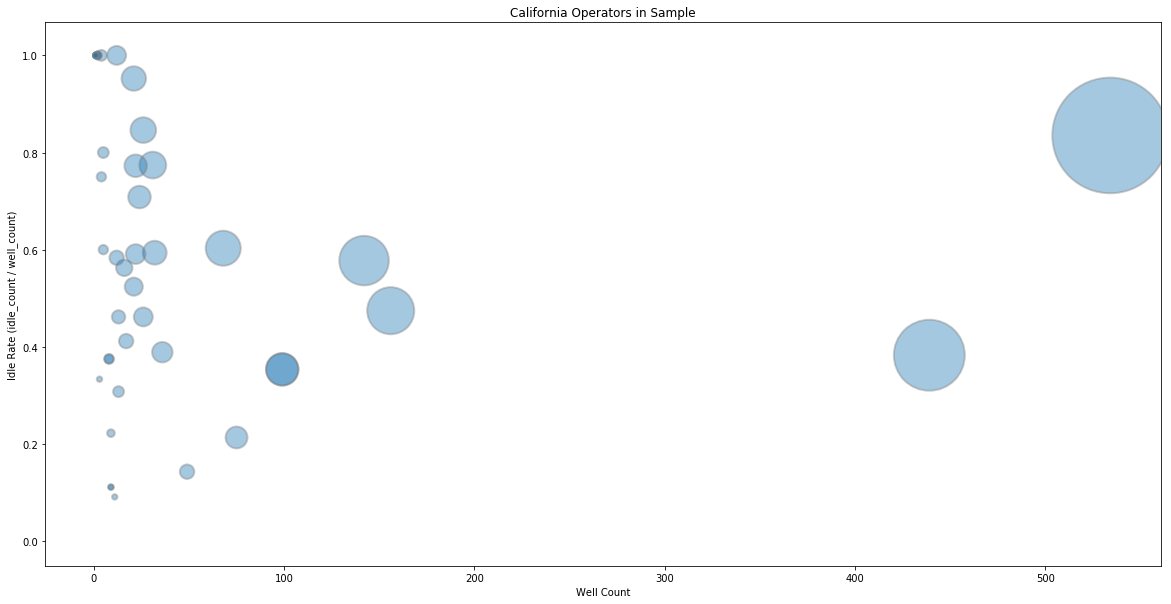

In [145]:
# Change color with c and alpha. I map the color to the X axis value.
plt.figure(figsize=(20,10))
plt.scatter(x, y, s=z*30, alpha=.4, edgecolors="grey", linewidth=2)
 
# Add titles (main and on axis)
plt.xlabel("Well Count")
plt.ylabel("Idle Rate (idle_count / well_count)")
plt.title('California Operators in Sample')


 
plt.show()


In [146]:
n= 103450

In [148]:
p = 30000/n
p

0.28999516674722087

In [149]:
samp_p * n

53868.55855855856

In [150]:
samp_n = 2220

In [152]:
samp_var = samp_n * samp_p * (1 - samp_p)
samp_var

554.0468468468468

In [158]:
samp_p

0.5207207207207207

In [175]:
stats.binom_test(1156, n=2220, p=p, alternative='two-sided')

1.7933137008925024e-114